<a href="https://colab.research.google.com/github/daisuke-shimizu/python-Gakushuin-programming1/blob/main/Programming1_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前回の演習問題の解答例

**演習 5-4**、**演習 5-6**、**演習 5-8**を除いて、解答例を示します。

### 演習 5-1

引数の`x`では$x$座標（$0 \le x \le 1$）を指定する時、
`unit_qcirc`関数は対応する四分円上の点の$y$座標を返すように、
以下のプログラムを完成せよ。

```python
def unit_qcirc(x):
  y = #　ここに関数の式を書きます
  return y
```

更に、関数`unit_qcirc(x)`を用いて、
半径1の四分円を$0\le x\le 1$の範囲で描画せよ。

### 解答例
```python
math.sqrt(1 - x**2)
```

### 演習 5-2

関数`unit_qcirc`のプログラムは、半径を1に固定して、四分円上の点の$y$座標を計算する。
半径を固定せず、半径$r$を関数の引数として指定し、
半径$r$の四分円を$0<x<r$で与える関数`qcirc(x,r)`を定義せよ。

その上で、描画範囲を$0 \le x \le r$として、四分円を描画せよ。

### 解答例

```python
def qcirc(x,r):
    return math.sqrt(r**2 - x**2)
```

### 演習 5-3
`draw_graph_proto`関数を使って、
平方根関数`math.sqrt`と対数関数`math.log`のグラフを描画せよ。

### 解答例

```python
draw_graph_proto(math.sin)
```

### 演習 5-5
演習 5-4を参考にして、
任意の区間$a<x<b$の区間で描画できるよう、関数`draw_graph(f, a, b)`を定義せよ。
区間$a < x < b$中に均等間隔で100個の値をとって、
その値を$x$座標とするグラフ上の点をプロットする。

ただし、プログラムの最初の行は
```python
def draw_graph(f, a, b):
```
とせよ。

### 解答

```python
def draw_graph(f,a,b):
    x = [a + (b - a) * n/100 for n in range(101)]
    y = [f(t) for t in x]
    plt.plot(x, y)
    plt.show()
```

ただし、この解は解答としては誤りを含んでいます。
以下を試してみて、また、問題文をよく読み直してみて、
プログラムを修正して下さい。

* 正弦関数`math.sin`を$0 \le x \le \pi$の範囲で描画せよ。
* 対数関数`math.log`を$0 \le x \le 1$の範囲で描画せよ。

### 演習 5-7
区間$a<x<b$で定義される任意の関数$f$に対して、
区間$a<x<b$での最大値を近似的に求める関数`maxf`を作成せよ。

**ヒント** 関数`draw_gragh`と同様に、区間$a<x<b$中に均等間隔でとった100個の$x$に足して$f(x)$を計算し、その最大値を近似値とせよ。

**ヒント** 前講でみたように`max(リスト名)`は、リストに含まれる要素の数値の最大値を返す。
例えば、`max([1,2,3])`は、値`3`を返す。

### 解答例

```python
def maxf(f,a,b):
    x = [a + (b - a) * n/100 for n in range(0:100)]
    return max([f(t) for t in x])
```

### 演習 5-9
関数$f$が「$a<x<b$で$f(x)>0$」という条件を満足する時、
区間$a<x<b$で曲線$y = f(x)$と$y=0$が囲む領域の面積を求める関数
`integral(f, a, b, N)`を作成せよ。


**ヒント** 演習 5-7で作成した`maxf`関数を用いて、関数$f$の区間$a<x<b$での最大値$m = \max_{a<x<b}f(x)$を求めよ。

**ヒント** $a<x<b$及び$0<y<m$の長方形領域の中で一様に点を発生させよ。
$a<x<b$を満たす乱数を一様に生成するには、`a + (b-a)*rnd.random()`が使える。
`rnd.random()`は、0と1の間で乱数を一様ランダムに発生させる。

**ヒント** ランダムに発生させた点$(x, y)$が領域$y<f(x)$に落ちる確率は、$\displaystyle\frac{\text{囲まれた領域の面積}}{矩形の面積}$であるので、$\displaystyle \frac S{(b-a)m}$である。
従って、$\displaystyle S = \frac{\text{領域内の天の個数}}N\cdot (b-a)m$になる。

### 解答例

```python
import random
def integral(f, a, b, N):
    m = maxf(f, a, b)
    x = [a + (b-a)*random.random() for _ in range(N)]
    y = [m * random.random() for _ in range(N)]
    S = 0
    for n in range(N):
        if y[n] < f(x[n]):
            S += 1
    return S/N * m * (b-a)
```

### 演習 5-10
演習 5-２で作成した関数`qcirc(x, r)`と演習 5-9で作成した面積（定積分）を求めるプログラムを利用し、$0 < x < 2$の範囲の半径２の四分円の面積を近似計算せよ。
また、値が$\pi$の近似になることを確認せよ。

**ヒント** 四分円の面積は、$0 \le x \le 2$の領域で、曲線$y = \mathrm{qcirc}(x, 2)$より下の領域の面積と等しい。

**ヒント** 以下のように関数$f(x)$を定義して、$f$を引数にして、演習７で作成した`integral`関数を呼び出す。

### 解答例

次のプログラムの引数を修正すると、正しい答えが得られます。

```python
def f(x):
    return qcirc(x, 2)
print(integral(f, 1, 2, 10))
```
  

# 第6回　第5回までの復習

第5回までで、Pythonについて、多くのことを学びました。
これまでに学んだ知識だけでも、実用的なプログラムをかなり書ける筈です。
この資料では、これまでの資料で少し分かりにくかった3項目、スコープとインデント、内分点、グラフの描画、について、整理します。

## スコープとインデント

Pythonは、インデントが意味を持つ珍しいプログラム言語です。
Python以外のプログラム言語でも、コードを読みやすくするために、インデントを利用してプログラムを記述することが推奨されますが、Pythonではインデントの利用を強制することで、プログラムの構造を理解しやすくすると共に、
従来のプログラム言語では頻発するある種のエラーを回避しようという狙いがあります。
ただ、逆に、インデントの幅が間違っていると、それだけでプログラムが動かなくなるなど、分かり難さの原因にもなっていると思います。
インデントを理解するためには、スコープという概念を理解しなければなりませんが、それは難しいものではありません。
次のプログラムを読んで、実行してください。
```python
print("インデントが正しくないプログラムの実行例です。")
for n in range (5):
  print(n, "の二乗は")
print(n**2, "です。")
print("")
print("本来意図したプログラムの実行結果です。")
for n in range (5):
  print(n, "の二乗は")
  print(n**2, "です。")
```

In [ ]:
print("インデントが正しくないプログラムの実行例です。")
for n in range (5):
  print(n, "の二乗は")
print(n**2, "です。")
print("")
print("本来意図したプログラムの実行結果です。")
for n in range (5):
  print(n, "の二乗は")
  print(n**2, "です。")

インデントが正しくないプログラムの実行例です。
0 の二乗は
1 の二乗は
2 の二乗は
3 の二乗は
4 の二乗は
16 です。

本来意図したプログラムの実行結果です。
0 の二乗は
0 です。
1 の二乗は
1 です。
2 の二乗は
4 です。
3 の二乗は
9 です。
4 の二乗は
16 です。


`for n in range(5):`は、`n`の値を0から4まで順番に変えて、繰り返し実行を行うことを意味しています。
繰り返すので、**ループ構造**と呼ばれることもあります。
では、プログラムのどの範囲の行を繰り返すかというのが問題となりますが、
この範囲が**forループのスコープ**です。
Pythonでは、`for`文のあとのインデントされた領域で、スコープを指定します。

例のプログラムの前半は、スコープの範囲の指定をしくじっています。
```python
for n in range (5):
  print(n, "の二乗は")
print(n**2, "です。")
```
`for`分のあと、インデントされているのは、
```python
  print(n, "の二乗は")
```
の一行だけです。
従って、`for`ループでは、この一行を5回繰り返します。その結果、
```
0 の二乗は
1 の二乗は
2 の二乗は
3 の二乗は
4 の二乗は
```
という表示が繰り返され、肝心の二乗の値が表示されません。

本来のプログラムの意図は、$n$の値を０から４まで順に取り替えて、$n^2$の値を5個表示することです。
従って、`for`ループでは、
```python
  print(n, "の二乗は")
  print(n**2, "です。")
```
の二行を5回繰り返さなければなりません。
プログラムの後半では、
```python
for n in range (5):
  print(n, "の二乗は")
  print(n**2, "です。")
```
と、`print(n, "の二乗は")`の一行だけでなく、`print(n**2, "です。")`を含めた二行を、
同じレベル（同じインデント幅）でインデントし、
`for`ループのスコープがこの2行であることを指定しています。

インデントの幅を間違えたり、インデントに全角スペースなどが含まれたりすると、プログラムがうまく動きません。
そのため、Colaboratoryでは、自動的にインデントを教えてくれます。
```python
for n in range(5):
```
とタイプした後でEnterを押下すると、勝手にインデントしてくれます。
コロン`:`がインデントを指示する記号で、
**`:`コロンをタイプしないとインデントしてくれない**ことに注意してください。
プログラムとしてもエラーが出ます。
```python
  print(n, "の二乗は")
```
を入力した後、Enterを押下すると、次の行の先頭には同じ幅のインデントが自動的に入力されます。
インデントを消して、スコープから抜けたい時は、バックスペースを押下すればOKです。

手入力でインデントを指定する時には、TabキーとShift+Tabキーを使って下さい。
**決してスペースは使わない**で下さい。
正しく半角スペースでインデントを指定できれば問題はありませんが、
えてしてエラーを誘発する原因になります。
**Tabキーでインデント幅が一段増え、Shift+Tabキーでインデント幅が一段減ります**。
インデント幅を間違えると、エラーで、プログラムは止まってしまうことがあります。
特に、**インデント中の全角のスペースは必ずエラー**を引き起こします。
全角のスペースと半角のスペースは区別がつきにくく、このエラーは取り除くことが困難です。
これが、インデントにスペースを使ってはいけない理由の一つです。

スコープは、`for`文だけではなく、多くの構文に存在します。
例えば、`if`文です。
`if`文では、`if`の後に論理式（真偽が判定できる式）が来て、その値が真である時に、
指定のプログラムを実行します。
真の時に実行されるプログラムも、任意数の行から構成することができるので、
その範囲をスコープとして指定する必要があります。
Pythonでは、一貫して、スコープはインデントで指定します。
次のコードを実行してください。
```python
import random as rnd
face = rnd.choice(['head', 'tail']) # コイントスの実行。headはコインの表、tailは裏の意味
count_head = 0
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
```

In [ ]:
import random as rnd
face = rnd.choice(['head', 'tail'])
count_head = 0
if face == 'head':
  count_head += 1
  print('コイントスの結果、表が出ました。')
  print('今までに、表が出た回数は、', count_head, '回です。')
if face == 'tail':
  print('コイントスの結果、裏が出ました。')

コイントスの結果、表が出ました。
今までに、表が出た回数は、 1 回です。


`face == 'head'`は論理式で、faceの値が文字列`'head'`であれば真、`'tail'`であれば偽の値になります。
headは英語で表、tailは裏を意味します。

`if face == 'head':`は、`face == 'head'`が真であれば、付属するスコープのプログラムを実行します。
そして、この場合のスコープは、`if face == 'head':`の行以下でインデントされた3行になります。
繰り返しですが、`if`文が成立する（論理式の値が真になる）時に実行するコードの範囲を、`if`文のスコープといいますが、スコープを指定してあげないと、Pythonは`if`文が成立しても、何を実行したらいいのかわからなくなってしまいます。

`if face == 'tail':`は、コイントスの結果裏`'tail'`が出た時に成立します。
この`if`文の後の1行しかインデントされていませんので、スコープはこの1行だけになります。

次のプログラムは、後9回、合計10回コイントスを行い、都度結果を表示すると共に、最後にまとめとして、合計で何回表が出たかを表示します。
```python
count_head = 0 # count_headの値をリセット
# 1回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 2回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 3回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 4回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 5回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 6回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 7回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 8回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 9回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 10回目のコイントス
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# まとめ
print("10回コイントスを行い、表は", count_head, "回出ました。")
```

このプログラムはやたらと長いので、`for`文を使って、短くしてみます。

前のプログラムでは、コイントスを行い、その結果を表示する同じプログラムを、
10回記述していたのに対し、
新しいプログラムでは、
`for`ループの中でプログラムを10回繰り返すことで、
何回も同じ内容を記述しなくて良いようにしています。
```python
import random as rnd
count_head = 0
for n in range(10):
  face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
  if face == 'head':
    count_head += 1
    print("コイントスの結果、表が出ました。")
    print("今までに、表が出た回数は、", count_head, "回です。")
  if face == 'tail':
    print("コイントスの結果、裏が出ました。")
# まとめ
print("10回コイントスを行い、表は", count_head, "回出ました。")
```

In [ ]:
count_head = 0 # count_headの値をリセット
# 1回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 2回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 3回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 4回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 5回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 6回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 7回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 8回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 9回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# 10回目
face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
if face == 'head':
  count_head += 1
  print("コイントスの結果、表が出ました。")
  print("今までに、表が出た回数は、", count_head, "回です。")
if face == 'tail':
  print("コイントスの結果、裏が出ました。")
# まとめ
print("10回コイントスを行い、表は", count_head, "回出ました。")


コイントスの結果、表が出ました。
今までに、表が出た回数は、 1 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 2 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 3 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 4 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 5 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 6 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 7 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 8 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 9 回です。
コイントスの結果、表が出ました。
今までに、表が出た回数は、 10 回です。
10回コイントスを行い、表は 10 回出ました。


このプログラムを見るとわかるように、
スコープは、入れ子構造をとります。
入子構造とは、スコープの中に、新たなスコープが定義されることです。
このプログラムでは、
`for`文のスコープ（4行〜10行）の中に、
`if`文のスコープが2箇所（6行〜8行、10行）存在します。

入れ子構造は、インデントのレベル（段数、インデント幅）で表現されます。
わかりやすいように、上のプログラムの核心部分を取り出して、調べてみましょう。
```python
for n in range(10):
  face = rnd.choice(['head', 'tail']) # headはコインの表、tailは裏の意味
  if face == 'head':
    count_head += 1
    print("コイントスの結果、表が出ました。")
    print("今までに、表が出た回数は、", count_head, "回です。")
  if face == 'tail':
    print("コイントスの結果、裏が出ました。")
```
1行目の`for n in range(10):`は`for`ループを宣言していますので、
繰り返し実行の範囲であるスコープが続きます。
このスコープは、１段**以上**のインデントが与えられた7行になります。

`for`文のスコープの中に`if face == 'head':`が現れ、
この`if`文のスコープを`for`文のスコープの中でさらに決定しなければなりませんが、
これはもう一段インデントを深くすることで行ます。
この例では、`if face == 'head':`の後の3行が、
この`if`文のスコープになりますが、インデントが一段深くなっていることがわかると思います。

最初の`if`文のスコープを抜けるためには、インデントを一段浅くします。
現在のインデントを一段深くするには、Tabキーを押下し、一段浅くするには、Shift+Tabを押下します。

`if face == 'tail':`のスコープは、
続く1行になりますので、インデントが一段深くなっていることがわかると思います。

このように、スコープの入れ子構造は、インデントの段数で表現されますが、
入れ子構造の深さ、つまり、インデントの段数の深さには制限はありません。
**新しいスコープに入ったらインデントを一段深くし、
スコープを抜けたらインデントを一段浅くする**という規則を覚えておけば、
間違いはありません。

関数の定義も複数行にわたることがありますので、定義の範囲をスコープで指定します。
ここでは、第4回と第5回のサンプルプログラムを使って、関数の定義方法を、スコープの観点から少し詳しく説明します。

第5回資料では、半径1の四分円を$0<x<1$で与える関数`unit_qcirc(x)`を、次のように定義しました。

半径１の円は、$x^2 + y^2 = 1$で与えられますが、四分円はそのうち$x \ge 0$、$y \ge 0$の部分です。
ですので、

$$
y = \sqrt{1 - x^2}
$$

が成り立ちます。
`unit_qcirc(x)`はこの式を使って、入力$x$に対して、`y`の値を返す関数になります。

原則として、関数は入力に対して出力を返すわけですが（出力を返さない関数もあります）、
関数独自の計算を行って、出力を`return`文を使って返すところまでが、関数の定義で、その関数のスコープとなります。
これまでと同じように、
関数のスコープもインデントを使って指定します。
演習5-1の答えは、
```python
import math
def unit_qcirc(x):
  y = math.sqrt(1 - x**2)
  return y
```
になります。
最初の行`def unit_qcirc(x):`に続く2行が、この関数定義のスコープで、
インデントされていることがわかると思います。

この関数定義と以下の検証のためのプログラムを、スコープとインデントに気をつけながら、同じコードセル内に記述し、実行結果を確かめてください。
```python
print(unit_qcirc(0.5))
```
`0.866...`が表示されれば、正解です。


In [ ]:
import math
def unit_qcirc(x):
  y = math.sqrt(1 - x**2)
  return y

print(unit_qcirc(0.5))

0.8660254037844386


もう少し複雑な例として、第4回で定義した組み合わせを求める関数`comb(n, m)`をみてみましょう。

```python
def comb(n, m): #nとmは整数でn≧m≧0
  if m == 0:
    return 1
  else:
    r = 1
    for i in range(m):
      r *= (n-i)/(m-i)
    return r
```

関数定義のスコープは、`def comb(n, m):`に続く7行ですが、
その中に、更に、スコープをもつプログラム行が含まれています。

* `def comb(n, m):`に続く7行は、関数定義のスコープであるため、1段インデントされます。
* `if m == 0:`は、続く行`return 1`がスコープなので、`return 1`の行は、更に、1段インデントされます。
* `else:`は`if`文のスコープ外なので、インデントを1段戻します。
* `else:`は続く4行をスコープとして持ちますので、これらの4行を、更に、1段深くインデントします。
* `else:`のスコープには、`for i in range(m):`を含まれ、この行は、次の行`r *= (n-i)/(m-i)`をスコープに持ちます。
従って、`r *= (n-i)/(m-i)`は、更に1段インデントされます。


## 内分点
グラフを描くために、区間の内分点を計算します。

区間$[a, b]$を等間隔に$n$等分する内分点のうち、$i$番目（0番目は$a$、$n$番目は$b$）の点の座標は次の式で与えられます。

$$
a + \frac{b - a}n \times i 
$$

これは、$n$等分する内分点の間隔は$\Delta = \frac{b-a}n$であり、
$i$番目の点は、始点$x = a$から$\Delta \times i$だけ離れていることによります。

高校で習った内分点の公式を覚えている人もいると思います。
座標$a$の点A、座標$b$の点Bを、$\alpha : \beta$に内分する点Cの座標$c$は、

$$
c = \frac\beta{\alpha+\beta} \cdot a + \frac\alpha{\alpha+\beta} \cdot b
$$

で与えられます。
$$
a + \frac{b - a}n \times i = \frac{n - i}n a + \frac in b
$$
ですので、実は、この式が、$\alpha:\beta = i : (n-i)$に分割する内分点を与える内分点の公式に他ならないことが分かります。

0番目（即ち、$x = a$)から、$n$番目（即ち、$x = b$）までの内分点の座標をリストとして得るためには、リストの内包表現を用いて、
```python
[a + (b - a) / n * i for i in range(n+1)]
```
とすれば良いことになります。
`range(n+1)`は0から$n$までの整数からなるリスト（と等価）であることを思い出してください。
$x = a$を除外したければ、
```python
[a + (b - a) / n * i for i in range(1, n+1)]
```
とすればよく、これは`range(1, n+1)`は1から$n$までの整数からなるリスト（と等価）であるからです。
$x = a$と$x = b$の両方を除外したければ、
```python
[a + (b - a) / n * i for i in range(1, n)]
```
とすれば良いでしょう。


実は、内分点の公式を使わなくても、関数一つで内分点の座標の配列オブジェクトを得る方法があります。
ただ、そのためには、`numpy`というライブラリを使う必要があります。
以下のプログラムを実行してみて下さい。
```
import numpy as np
print(np.linspace(0,1,11))
print(np.arange(0, 1.1, 0.1))
```

In [ ]:
import numpy as np
print(np.linspace(0, 1, 11))
print(np.arange(0, 1.1, 0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


いずれも、`[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]`が出力として得られます。

* `np.linspace(0,1,11)`は、0と1を端点とする区間$0 \le x \le 1$を、
端点を含めて11個の点で等間隔に内分し、その座標のリストを与えます。
* `np.arange(0, 1.1, 0.1)`は、区間$0 \le x < 1.1$の区間を0.1間隔で内分する内分点の座標のリストを与えます。

内包表現はPythonの特長ある
グラフを描画する時など、内分点を利用する場面はしばしばあるので、`numpy`のこの関数を覚えておくと便利です。

**注** 
次のプログラムを実行してみて下さい。
```python
print([n/10 for n in range(11)])
```
`[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`が出力として得られる筈です。
`linspace`と`arange`の出力と比べると、座標の区切りにコンマ`,`が使われている点が相違していることが分かると思います。
実は、この違いは、`linspace`と`arange`の出力は、厳密にはリストではないことに起因します。
`linspace`と`arange`の出力のクラス（タイプ）は`numpy.ndarray`であることが、以下のプログラムを実行すると分かります。
```python
print(type(np.linspace(0,1,11)))
print(type([n/10 for n in range(11)]))
```

In [ ]:
print([n/10 for n in range(11)])

print(type(np.linspace(0,1,11)))
print(type([n/10 for n in range(11)]))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
<class 'numpy.ndarray'>
<class 'list'>


## グラフの描画
以下のプログラムは、区間$-1 \le x \le 1$で$y = x^2$のグラフを描画するためのものです。
早速、`numpy`の`linspace`を使ってみました。
```python
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-1, 1, 21)
y = [t**2 for t in x]
plt.plot(x, y)
plt.grid()
plt.show()
```

上のプログラムを実行して、グラフを描画してみましょう。

`x = np.linspace(-1, 1, 21)`の行は、

* `x = np.arange(-1, 1.1, 0.1)`
* `x = [-1 + 0.1 * n for n in range(21)]`

のいずれかで置き換えても、正しい結果がでます。
実際に置き換えたプログラムも実行してみて、同じ描画結果が得られることも確認して下さい。



[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


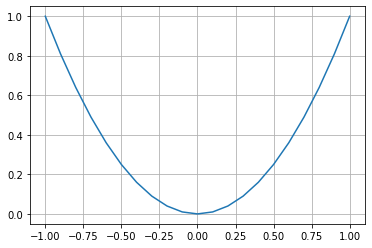

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-1, 1, 21)
y = [t**2 for t in x]
print(x)
plt.plot(x,y)
plt.grid()
plt.show()


上の例を使って、`pyplot`がグラフを描画する仕組みを復習します。

* `x = np.linspace(-1, 1, 21)`の行は、プロットする複数の点の$x$座標を決定する。
* `y = [t**2 for t in x]`の行は、プロットする点の$y$座標を計算する。
* `x`と`y`は、共に、21個の要素を含むリストであり、それぞれ、$x[0],\dots , x[20]$、及び、$y[0],\dots , y[20]$が要素になる。
* `pyplot.plot`関数は、20個の点$(x[0], y[0]), (x[1], y[1]), \dots, (x[20], y[20])$をプロットし、プロットした点をこの順番で線で結ぶことで、曲線のグラフを描画する。

従って、`x`と`y`の要素数が異なる、つまり、`len(x)`と`len(y)`の値が異なると、`pyplot.plot`関数は描画ができずに、エラーを出力します。

例えば、
```python
print(y)
y.pop(-1)
print(y)
```
を実行した後で、
```python
plt.plot(x, y)
plt.grid()
plt.show()
```
を実行してみて下さい。
次のエラーを出力して、グラフは描画されません。
```
ValueError: x and y must have same first dimension, but have shapes (21,) and (20,)
```
実は、`pop`はリストの指定した番号の要素を取り除く関数で、
リストにおいて-1は最後の要素の番号でしたから、`y.pop(-1)`は、`y`の最後の要素を取り除いています。
同様に、`y.pop(0)`とすれば、先頭の要素を取り除くことができます。

[1.0, 0.81, 0.6400000000000001, 0.48999999999999994, 0.36, 0.25, 0.15999999999999992, 0.08999999999999996, 0.03999999999999998, 0.009999999999999995, 0.0, 0.010000000000000018, 0.04000000000000007, 0.09000000000000002, 0.16000000000000011, 0.25, 0.3600000000000001, 0.49000000000000027, 0.6400000000000001]
[1.0, 0.81, 0.6400000000000001, 0.48999999999999994, 0.36, 0.25, 0.15999999999999992, 0.08999999999999996, 0.03999999999999998, 0.009999999999999995, 0.0, 0.010000000000000018, 0.04000000000000007, 0.09000000000000002, 0.16000000000000011, 0.25, 0.3600000000000001, 0.49000000000000027]


ValueError: ignored

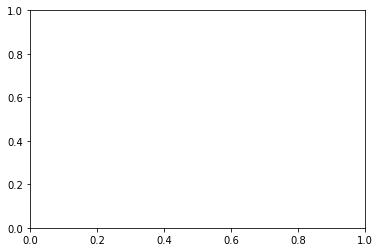

In [ ]:
import matplotlib.pyplot as plt
print(y)
y.pop(-1)
print(y)

plt.plot(x, y)
plt.grid()
plt.show()

エラーメッセージは英語ですが、頑張って読んでみると、情報が得られます。

`x and y must have same first dimension`は、「`x`と`y`は同じ次元でなくてはならない」と言っていますが、続いて、
`but have shapes (21,) and (20,)`とあるので、どうも、次元とは要素の数のことで、`x`の要素が21個、`y`の要素が20個と、
一致していないことがエラーの原因であると想像がつきます。
因みに、リストはベクトルとみなすことができますので、要素の数を次元と呼んでいます。

以下の演習を、`linspace``と`arange`関数をそれぞれ利用して描画せよ。

### 演習 6-1
区間$0 \le x \le 2\pi$において、$y = \sin x$のグラフを描画せよ。

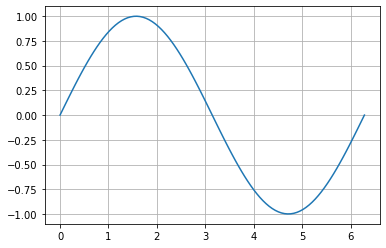

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.linspace(0, 2*(math.pi), 100)
y = [math.sin(t) for t in x]

plt.plot(x,y)
plt.grid()
plt.show()

### 演習 6-2
区間$0 < x \le e$において、$y = \log_e x$のグラフを描画せよ。

**ヒント**
リスト`x`の先頭の要素は、`x.pop(0)`で取り去ることが出来る。

**ヒント**
ネイピア数$e=2.718\dots$は、`math.e`により利用することができる。

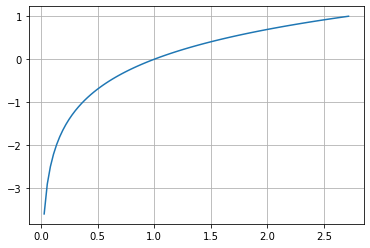

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(0, math.e, 100)
x = np.delete(x, 0)

y = [math.log(t) for t in x]
# y = [2*t for t in x]

plt.plot(x,y)
plt.grid()
plt.show()


### 演習 6-3
下記のプログラム行を実行することによって、区間$0 < x < 2\pi$を100等分する解像度で、区間において$y = \sin x$のグラフを描画できるように、
第5回講義「関数オブジェクト」で導入した`draw_graph_proto(f)`をベースにして、
関数`draw_graph(f, a, b, N)`のプログラムを作成せよ。
```python
draw_graph(math.sin, 0, 2 * math.pi, 100）
```


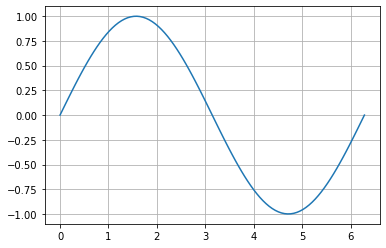

In [ ]:
def draw_graph(f, a, b, N):
  x = np.linspace(a, b, N)
  y = [f(t) for t in x]
  plt.plot(x, y)
  plt.grid()
  plt.show()


draw_graph(math.sin, 0, 2*math.pi, 100)